# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

##  Introduction: Business Problem 
As an immigrant to Canada and I did not visit it before so I have no realistic  knowledge about the country that it will be my home country, I want to choose the city that I will live in and the location of my home in that city .
Each of city and location have their considerations.
City must have minimum rate of crime especially hate crime.
Location has to have the necessary venues close to where I live because I am new comer and have no means of transport under my hand around the clock.

## Problem :
Finding the best city for a newcomer based on safety and the number of facilities.
## Data and data sources.
## Data  
1-	Canada main and largest cities .
We can get it from Wikipedia.
Source :URL: https://en.wikipedia.org/wiki/List_of_the_100_largest_population_centres_in_Canada'
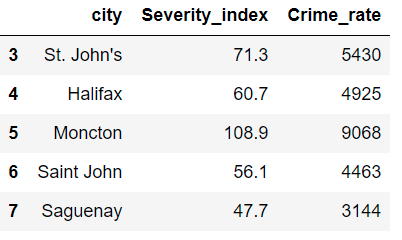

2-	Crime rate ,we can get it from Canada government web site under the name of ‘Police-reported Crime Severity Index and crime rate, by census metropolitan area, 2019’
Source :URL:’ Police-reported Crime Severity Index and crime rate, by census metropolitan area, 2019 (statcan.gc.ca)’
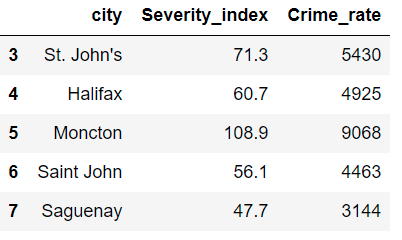

3-	Hate Crime rate ,we can get it from Canada government web site under the name of ‘Police-reported hate crime, number of incidents and rate per 100,000 population, Census Metropolitan Areas’
Source : URL:’https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3510019101’
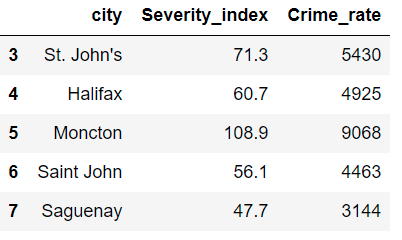

4-	Canada cities and their geographical coordinates, Population and density we can download the csv file from simplemaps.com website. 
Source URL:’https://simplemaps.com/data/canada-cities’
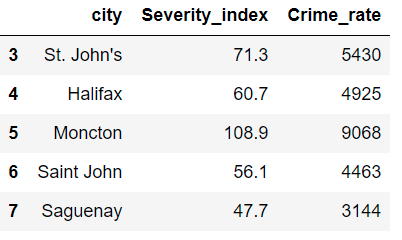

5-	Venues in neighbourhood We can use four square API.


## Methodology to extract and prepare data :
•	Pandas with read_html to read and convert included table to dataframe

•	Beautiful soup to for web scraping.

•	Pandas for cleaning and filling nulls.
## Stakeholders: 
People are willing to come to Canada for immigration.

## Methodology  :
1 Using cluster (kmean) from sklearn to cluster the cities in three based on 'Hate','Severity_index','Crime_rate' to choose the safest cluster based on statisics test on each of cluster

2 Using four square Api to grap the neigbourhood and choose the best based on avilability of facilities by numbers by applying statistical methods.



## Discussion 
1 locations is for the center of each city 
2 we may find spots in some city is bussier than the other but we take the center as indicatior
3 we filled (impute) some city with hate crime rate and/or crime rate and/or Crime Severity Index that are missing.
4 we are here represent the approach and the application

## Conclusion 
Best city is :
    1-Toronto with more than 100 venues (maximum return in for square for standard user is 100)
    
    2-Halifax with 95 venues
    
    3-st_jhons with 41 venues
    
    4-Sant_John_s with 8 venues

## Importing essential libraries

In [143]:
import requests
import plotly.express as px
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display_html
import folium # plotting library
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
from sklearn.preprocessing import StandardScaler

## Getting Canada main and largest cities

In [144]:
ur='https://en.wikipedia.org/wiki/List_of_Canadian_provinces_and_territories%27_largest_municipalities'
r=requests.get(ur)
print(r.status_code)

200


In [145]:
urban1=pd.read_html('https://en.wikipedia.org/wiki/List_of_Canadian_provinces_and_territories%27_largest_municipalities')

In [146]:
all=[]
for c in urban1[0].columns:
    if (c in ['Largest municipality', '2nd largest','3rd largest']):
        dff=urban1[0][c]
        for i in dff:
            all.append(i)
urban2=pd.read_html('https://en.wikipedia.org/wiki/List_of_the_100_largest_population_centres_in_Canada',header=[0])
urban2[0][['Population centre','Population','Class']].head()

,Population centre,Population,Class
0,Population centre,2016,Class
1,Toronto,5429524,Large urban
2,Montreal,3519595,Large urban
3,Vancouver,2264823,Large urban
4,Calgary,1237656,Large urban


## Getting Canada cities coordinates data from https://simplemaps.com/data/canada-cities website as csv

In [147]:
canadaCities_df=pd.read_csv('canadacities.csv')
df1=canadaCities_df[['city','population','density','lat','lng']]
df1.head()

,city,population,density,lat,lng
0,Toronto,5429524,4334.4,43.6577,-79.3788
1,Montreal,3519595,3889.0,45.5089,-73.5617
2,Vancouver,2264823,5492.6,49.2500,-123.1000
3,Calgary,1239220,1501.1,51.0500,-114.0667
4,Edmonton,1062643,1360.9,53.5344,-113.4903


## Merging major cities location with the hate crime rates
## filling null values with the mean of Hate crime of dataset

In [148]:
all=pd.DataFrame(all)
all.rename(columns={0:'city'},inplace=True)
all_merged=all.merge(df1,on='city')
hc=pd.read_csv('hatecrime1.csv')
all_merged2=all_merged.merge(hc,on='city',how='left')
m=all_merged2.VALUE.mean()
all_merged2['VALUE'].fillna(m,inplace=True)
all_merged2.rename(columns={'VALUE':'Hate'},inplace=True)
all_merged2.head()

,city,population,density,lat,lng,Hate
0,Calgary,1239220,1501.1,51.0500,-114.0667,5.2
1,Vancouver,2264823,5492.6,49.2500,-123.1000,8.2
2,Winnipeg,705244,1430.0,49.8844,-97.1464,5.0
3,Moncton,108620,506.0,46.1328,-64.7714,4.9
4,St. John's,108860,244.1,47.5615,-52.7126,1.0


## Getting Canada cities crime rates and severity and renaming columns and drop un nessesary columns.

In [149]:
crime=pd.read_html('https://www150.statcan.gc.ca/n1/daily-quotidien/201029/t003a-eng.htm')
crime[0].rename(columns={'Unnamed: 0':'city','2019 – Crime Severity Index':'Severity_index','2019 – Crime rate':'Crime_rate'},inplace=True)
Crime_table=crime[0]
Crime_table.drop([0,1,2],inplace=True)
Crime_table.drop(['2018 to 2019 – Crime rate','2018 to 2019 – Crime Severity Index'],axis=1,inplace=True)
Crime_table.head()

,city,Severity_index,Crime_rate
3,St. John's,71.3,5430
4,Halifax,60.7,4925
5,Moncton,108.9,9068
6,Saint John,56.1,4463
7,Saguenay,47.7,3144


## Merging major cities location with the hate crime rates and the crime rate dataset

In [150]:
all_merged2=all_merged2.merge(Crime_table,on='city',how='left')
all_merged2.Severity_index =all_merged2.Severity_index .astype('float64')
all_merged2.Crime_rate =all_merged2.Crime_rate.astype('float64')

In [151]:
m1=all_merged2.Severity_index.mean()
m2=all_merged2.Crime_rate.mean()
all_merged2.Severity_index.fillna(m1,inplace=True)
all_merged2.Crime_rate.fillna(m2,inplace=True)

In [152]:
all_merged2.head()

,city,population,density,lat,lng,Hate,Severity_index,Crime_rate
0,Calgary,1239220,1501.1,51.0500,-114.0667,5.2,92.9,6625.0
1,Vancouver,2264823,5492.6,49.2500,-123.1000,8.2,93.8,6974.2
2,Winnipeg,705244,1430.0,49.8844,-97.1464,5.0,131.7,8658.0
3,Moncton,108620,506.0,46.1328,-64.7714,4.9,108.9,9068.0
4,St. John's,108860,244.1,47.5615,-52.7126,1.0,71.3,5430.0


## Normalizing or scaling data using standard scaler

In [153]:
scaler = StandardScaler()
scaler.fit(all_merged2.loc[:,['Hate','Severity_index','Crime_rate']])

StandardScaler()

## Clustering on crime rates and hate crime rate

In [154]:
k=3
kmeans = KMeans(n_clusters = k,random_state=0).fit(scaler.transform(all_merged2.loc[:,['Hate','Severity_index','Crime_rate']]))
kmeans.labels_
all_merged2['lable']=kmeans.labels_
# cluster centers
kmeans.cluster_centers_

array([[ 2.17868544e-01, -2.11269038e-03, -1.11182623e-02],
       [-6.88083146e-01, -2.18381762e+00, -2.14133529e+00],
       [-6.69597330e-01,  1.75888516e+00,  1.77533050e+00]])

In [155]:
import matplotlib.pyplot as plt

In [156]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MaxAbsScaler()
cam=pd.DataFrame( min_max_scaler.fit_transform(scaler.inverse_transform(kmeans.cluster_centers_)))
cam.rename(columns={0:'Hate',1:'Severity_index',2:'Crime_rate'},inplace=True)
cam

,Hate,Severity_index,Crime_rate
0,1.000000,0.777769,0.776493
1,0.712857,0.502447,0.509977
2,0.718717,1.000000,1.000000


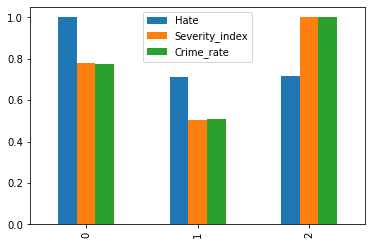

In [157]:
## Scaled for representation 'It is clear that cluster with lable one is the beat  for safty'
cam.plot.bar()

In [158]:
## checking the centers of each cluster with the real values 

In [159]:
for l in all_merged2.lable.unique():
    print('______________Hate______________')
    print('lable {0}: {1}'.format(l,all_merged2.Hate[all_merged2.lable==l].mean()))
    print('______________Severity_index______________')
    print('lable {0}: {1} '.format(l,all_merged2.Severity_index[all_merged2.lable==l].mean()))
    print('______________Crime Rate_____________')
    print('lable {0}: {1} '.format(l,all_merged2. Crime_rate[all_merged2.lable==l].mean()))

   

______________Hate______________
lable 0: 5.120238095238096
______________Severity_index______________
lable 0: 93.76785714285715 
______________Crime Rate_____________
lable 0: 6961.7285714285745 
______________Hate______________
lable 2: 3.6800000000000006
______________Severity_index______________
lable 2: 120.55999999999999 
______________Crime Rate_____________
lable 2: 8965.6 
______________Hate______________
lable 1: 3.65
______________Severity_index______________
lable 1: 60.574999999999996 
______________Crime Rate_____________
lable 1: 4572.25 


# the ruslts shows thst lable 1 have the best safty metrics

In [180]:
all_merged2[all_merged2.lable==1]

,city,population,density,lat,lng,Hate,Severity_index,Crime_rate,lable
4,St. John's,108860,244.1,47.5615,-52.7126,1.0,71.3,5430.0,1
6,Halifax,403131,73.4,44.6488,-63.5752,1.8,60.7,4925.0,1
8,Toronto,5429524,4334.4,43.6577,-79.3788,7.2,54.2,3471.0,1
16,Saint John,67575,213.8,45.2806,-66.0761,4.6,56.1,4463.0,1


# describing clusters

In [163]:
for i in range(len(all_merged2.lable.unique())):
    print('labet number',i)
    print(all_merged2.drop(columns=(['lable','lat','lng']))[all_merged2.lable==i].describe())

labet number 0
         population      density       Hate  Severity_index   Crime_rate
count  2.800000e+01    28.000000  28.000000       28.000000    28.000000
mean   3.924321e+05  1012.760714   5.120238       93.767857  6961.728571
std    7.993454e+05  1285.093007   1.289219        0.170084    65.992597
min    1.525000e+03     6.100000   4.766667       92.900000  6625.000000
25%    9.214500e+03   145.650000   4.766667       93.800000  6974.200000
50%    2.883200e+04   527.450000   4.766667       93.800000  6974.200000
75%    4.467165e+05  1467.875000   4.766667       93.800000  6974.200000
max    3.519595e+06  5492.600000  10.800000       93.800000  6974.200000
labet number 1
         population      density      Hate  Severity_index   Crime_rate
count  4.000000e+00     4.000000  4.000000         4.00000     4.000000
mean   1.502272e+06  1216.425000  3.650000        60.57500  4572.250000
std    2.622427e+06  2079.979731  2.825479         7.65305   833.637561
min    6.757500e+04    73

## map of cities and corresponding cluster

In [165]:
latMean=all_merged2.lat.mean()
lonMean=all_merged2.lng.mean()
import folium # plotting library
color=['red','green','blue']
map_canada = folium.Map(location=[latMean,lonMean],zoom_start=4)

for lat,lng,borough,neighbourhood,lable in zip(all_merged2['lat'],all_merged2['lng'],all_merged2['city'],all_merged2['Hate'],all_merged2['lable']):
   
    label = '{},\n {},{}'.format(neighbourhood,lat,lng )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=10,
    popup=label,
    color=color[lable],
    fill=True,
    fill_color=color[lable],
    fill_opacity=0.3,
    parse_html=False).add_to(map_canada)
map_canada

## Function with input of the location(lat,lng) and the radius of coverd area and output of neighborhood from four square api

In [166]:
def get_neighborhood (location,r=500):
    
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
    
    CLIENT_ID = '52BU5JWK3WIPZWE32WVAS0KTF0GXGKFXMIVF0MINTKJCVHM4' # your Foursquare ID
    CLIENT_SECRET = '1SWFKRBFYR0JJDUXXC0DO4W0P0WBX1ZURXPXHKBGEW4UHDG5' # your Foursquare Secret
    ACCESS_TOKEN = 'ADZPUSYJ15NJ2WS2Q2J0MCH2JTFVQFIRCSTS0RWBXDORGIOI'
    VERSION = '20180605' # Foursquare API version
    LIMIT = 500 # A default Foursquare API limit value
    radius=r
    print('Your credentails:')
    print('CLIENT_ID: ' + CLIENT_ID)
    print('CLIENT_SECRET:' + CLIENT_SECRET)
    neighborhood_latitude=location[0]
    neighborhood_longitude=location[1]
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ACCESS_TOKEN={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        ACCESS_TOKEN,
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius, 
        LIMIT)
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.address']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    df3=pd.DataFrame(nearby_venues.groupby('categories')['categories'].count(),index=None)
    df3.rename(columns={'categories':'Value'},inplace=True)
    df3.sort_values('Value',ascending=False,inplace=True)
    fig5=px.treemap(df3,path=[df3.index],values=df3['Value'])
    print(nearby_venues.head())
    fig5.show()
    return( nearby_venues,df3,fig5)

## Cities in cluster labled #1

In [167]:
e=all_merged2[['city','lat','lng']][all_merged2.lable==1]
for l in e.values:
    print(l)

["St. John's" 47.5615 -52.7126]
['Halifax' 44.6488 -63.5752]
['Toronto' 43.6577 -79.3788]
['Saint John' 45.2806 -66.0761]


In [168]:
[e.values[0][0],e.values[0][1]]
e

,city,lat,lng
4,St. John's,47.5615,-52.7126
6,Halifax,44.6488,-63.5752
8,Toronto,43.6577,-79.3788
16,Saint John,45.2806,-66.0761


# exploring venues in each city in the cluster labled 1

In [170]:
res=[]
for lat,lng,city in zip(e['lat'],e['lng'],e['city']):
    
    try:
      
      print('city is ',city)
      res.append(get_neighborhood([lat,lng],500))
            
    except:
        print('Somthing get wrong')
        pass
           

city is  St. John's
Your credentails:
CLIENT_ID: 52BU5JWK3WIPZWE32WVAS0KTF0GXGKFXMIVF0MINTKJCVHM4
CLIENT_SECRET:1SWFKRBFYR0JJDUXXC0DO4W0P0WBX1ZURXPXHKBGEW4UHDG5
                        name          categories        lat        lng  \
0      Adelaide Oyster House  Seafood Restaurant  47.561266 -52.710442   
1  Piatto Pizzeria + Enoteca         Pizza Place  47.562480 -52.710241   
2            Bridie Molloy's                 Pub  47.562001 -52.710006   
3            Christian's Pub            Dive Bar  47.561412 -52.711038   
4        Sound Salon And Spa                 Spa  47.561881 -52.709865   

                address  
0                   NaN  
1  377 Duckworth Street  
2       5 George Street  
3            George St.  
4         301 Water St.  


<ipython-input-166-0dcfb3f0683c>:37: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



city is  Halifax
Your credentails:
CLIENT_ID: 52BU5JWK3WIPZWE32WVAS0KTF0GXGKFXMIVF0MINTKJCVHM4
CLIENT_SECRET:1SWFKRBFYR0JJDUXXC0DO4W0P0WBX1ZURXPXHKBGEW4UHDG5
                                        name                     categories  \
0                         Stillwell Beer Bar                            Bar   
1                             Gio Restaurant                     Restaurant   
2  GoodLife Fitness Halifax Barrington Place                            Gym   
3                          The Wooden Monkey  Vegetarian / Vegan Restaurant   
4                             Freak Lunchbox                    Candy Store   

         lat        lng                  address  
0  44.646908 -63.573875       1672 Barrington St  
1  44.647068 -63.576017       1725 Market Street  
2  44.649803 -63.574935  1903 Barrington St, 120  
3  44.646967 -63.575471          1707 Grafton St  
4  44.647708 -63.574449      1723 Barrington St.  


<ipython-input-166-0dcfb3f0683c>:37: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



city is  Toronto
Your credentails:
CLIENT_ID: 52BU5JWK3WIPZWE32WVAS0KTF0GXGKFXMIVF0MINTKJCVHM4
CLIENT_SECRET:1SWFKRBFYR0JJDUXXC0DO4W0P0WBX1ZURXPXHKBGEW4UHDG5
            name      categories        lat        lng  \
0  Page One Cafe            Café  43.657772 -79.376073   
1    Blaze Pizza     Pizza Place  43.656518 -79.380015   
2    Oakham Café            Café  43.658078 -79.378315   
3   Burrito Boyz   Burrito Place  43.656265 -79.378343   
4    UNIQLO ユニクロ  Clothing Store  43.655910 -79.380641   

                       address  
0                106 Mutual St  
1  10 Dundas Street East, #124  
2                 55 Gould St.  
3               74 Dundas St E  
4                 220 Yonge St  


<ipython-input-166-0dcfb3f0683c>:37: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



city is  Saint John
Your credentails:
CLIENT_ID: 52BU5JWK3WIPZWE32WVAS0KTF0GXGKFXMIVF0MINTKJCVHM4
CLIENT_SECRET:1SWFKRBFYR0JJDUXXC0DO4W0P0WBX1ZURXPXHKBGEW4UHDG5
               name      categories        lat        lng            address
0    RBC Royal Bank            Bank  45.278394 -66.077164  111 LANSDOWNE AVE
1  Sobeys Lansdowne   Grocery Store  45.279695 -66.078641  149 Lansdowne Ave
2       Dairy Queen  Ice Cream Shop  45.282227 -66.070681  115 Wellesley Ave
3       Tim Hortons     Coffee Shop  45.277686 -66.077443   75 Lansdowne Ave
4            Subway  Sandwich Place  45.279057 -66.077092  95 Landsdowne Ave


<ipython-input-166-0dcfb3f0683c>:37: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [171]:
res=pd.DataFrame(res)

In [172]:
res

,0,1,2
0,name...,Value categorie...,Figure({\n 'data': [{'branchvalues': 'total...
1,...,Value categorie...,Figure({\n 'data': [{'branchvalues': 'total...
2,name categori...,Value categories ...,Figure({\n 'data': [{'branchvalues': 'total...
3,name categorie...,Value categories ...,Figure({\n 'data': [{'branchvalues': 'total...


In [173]:
st_jhons=res[0][0]
Halifax=res[0][1]
Toronto=res[0][2]
Sant_John_s=res[0][3]

In [174]:
st_jhons

,name,categories,lat,lng,address
0,Adelaide Oyster House,Seafood Restaurant,47.561266,-52.710442,NaN
1,Piatto Pizzeria + Enoteca,Pizza Place,47.562480,-52.710241,377 Duckworth Street
2,Bridie Molloy's,Pub,47.562001,-52.710006,5 George Street
3,Christian's Pub,Dive Bar,47.561412,-52.711038,George St.
4,Sound Salon And Spa,Spa,47.561881,-52.709865,301 Water St.
5,Chinched Bistro,Gastropub,47.562671,-52.710359,5 Bates Hill
6,Gypsy Tea Room,Restaurant,47.561516,-52.709910,315 Water St.
7,Rocket Bakery,Bakery,47.562434,-52.708892,272 Water St
8,Shamrock City,Bar,47.560831,-52.710707,340 Water Street
9,Jack Astor's,Restaurant,47.561296,-52.708671,125 Harbour Drive


In [175]:

Toronto

,name,categories,lat,lng,address
0,Page One Cafe,Café,43.657772,-79.376073,106 Mutual St
1,Blaze Pizza,Pizza Place,43.656518,-79.380015,"10 Dundas Street East, #124"
2,Oakham Café,Café,43.658078,-79.378315,55 Gould St.
3,Burrito Boyz,Burrito Place,43.656265,-79.378343,74 Dundas St E
4,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641,220 Yonge St
...,...,...,...,...,...
95,Ho Jan 好棧粉麵小廚,Chinese Restaurant,43.661483,-79.381111,"45 Carlton St, unit 2"
96,Marshalls,Department Store,43.659308,-79.382462,382 Yonge Street
97,Williams-Sonoma,Kitchen Supply Store,43.653478,-79.380434,222 Yonge St
98,Smoke's Poutinerie,Poutine Place,43.657379,-79.373455,203 Dundas St. E


In [176]:
Halifax

,name,categories,lat,lng,address
0,Stillwell Beer Bar,Bar,44.646908,-63.573875,1672 Barrington St
1,Gio Restaurant,Restaurant,44.647068,-63.576017,1725 Market Street
2,GoodLife Fitness Halifax Barrington Place,Gym,44.649803,-63.574935,"1903 Barrington St, 120"
3,The Wooden Monkey,Vegetarian / Vegan Restaurant,44.646967,-63.575471,1707 Grafton St
4,Freak Lunchbox,Candy Store,44.647708,-63.574449,1723 Barrington St.
...,...,...,...,...,...
91,Sam Slick's Lounge (Harbourcity Bar and Grill),Pub,44.651044,-63.576270,1990 Barrington St
92,Ko-Doraku,Sushi Restaurant,44.651467,-63.574717,"1949 Upper Water Street, 2nd Floor"
93,Casino Nova Scotia,Casino,44.652578,-63.576385,1983 Upper Water Street
94,Halifax Waterfront Children's Playground,Playground,44.647258,-63.570363,NaN


In [179]:
Sant_John_s

,name,categories,lat,lng,address
0,RBC Royal Bank,Bank,45.278394,-66.077164,111 LANSDOWNE AVE
1,Sobeys Lansdowne,Grocery Store,45.279695,-66.078641,149 Lansdowne Ave
2,Dairy Queen,Ice Cream Shop,45.282227,-66.070681,115 Wellesley Ave
3,Tim Hortons,Coffee Shop,45.277686,-66.077443,75 Lansdowne Ave
4,Subway,Sandwich Place,45.279057,-66.077092,95 Landsdowne Ave
5,Shoppers Drug Mart,Pharmacy,45.277185,-66.077326,57 Lansdowne Ave
6,NB Liquor,Liquor Store,45.281566,-66.075750,55 Lansdowne Place
7,Pizza Delight,Pizza Place,45.277825,-66.078131,Lansdown plaza
8,First Choice Haircutters,Salon / Barbershop,45.277400,-66.077866,87 Lansdowne Ave Unit 7


## Result
Best city is :
    1-Toronto with more than 100 venues (maximum return in for square for standerd user is 100)
    2-Halifax with 95 venues
    3-st_jhons with 41 venues
    4-Sant_John_s with 8 venues